In [9]:
from __future__ import print_function
from IPython.display import display

import tensorflow as tf
import cPickle as pickle
import pandas as pd
import pybel as pb
import tflon
import code

In [12]:
m1 = pb.readstring('smi', "CC/[NH+]=C/1\c2ccccc2/C(=[NH+]\CC)/N1    2328134")
m2 = pb.readstring('smi', "C[N+](=COP(=O)(Cl)Cl)C    10220177")
m3 = pb.readstring('smi', "c1(c(c(c(c(c1[O-])[N+]#N)[O-])[N+]#N)[O-])[N+]#N    14322914")
molecules = [m1, m2, m3]
data = { 'Structure': [tflon.chem.Molecule.from_pymol(m) for m in molecules] }
ix =  [ int(m.title) for m in molecules ]
molecules = tflon.chem.MoleculeTable( pd.DataFrame(data=data, index=ix) )

In [20]:
def predict(molecules, modelfile, reps=1):
    tflon.system.reset()
    model = tflon.model.Model.load(modelfile)
    
    with tf.Session() as S:
        model.initialize()
        out = None
        for i in xrange(reps):
            up = model.infer({'molecules': molecules}, query='molecule')
            out = up if out is None else out + up
        out /= float(reps)
    return out

In [21]:
wave_u0_out = predict(molecules, 'models/u0_wave.pyp', reps=10)

2019-12-30 17:04:22.529595: W Parameter setting use_aromatic was not used by any module


In [24]:
mpnn_g_u0_out = predict(molecules, 'models/u0_mpnn_g.pyp')

2019-12-30 17:04:42.115905: W Parameter setting use_aromatic was not used by any module


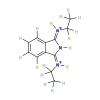

Wave total energy estimate (kcal/mol): -631.22
MPNN-G total energy estimate (kcal/mol): -631.26


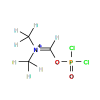

Wave total energy estimate (kcal/mol): -1585.29
MPNN-G total energy estimate (kcal/mol): -1585.33


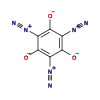

Wave total energy estimate (kcal/mol): -782.68
MPNN-G total energy estimate (kcal/mol): -782.63


In [25]:
for ix in molecules.index:
    mol = molecules.data['Structure'].loc[ix].pymol
    display(mol)
    print("Wave total energy estimate (kcal/mol): %.2f" % (wave_u0_out['TotalE(Ha)'].loc[ix]))
    print("MPNN-G total energy estimate (kcal/mol): %.2f" % (mpnn_g_u0_out['TotalE(Ha)'].loc[ix]))